<a href="https://colab.research.google.com/github/WESTZERO115/EoI/blob/main/SeoYoung/TIL/AI_Programming/Examples/%EA%B3%BC%EC%A0%9C01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGD: 0.8251166741053263
Adam: 0.892633338769277
Adagrad: 0.8248999913533529
RMSprop: 0.8707500100135803
걸린 시간은  1591.1131329536438 초입니다.


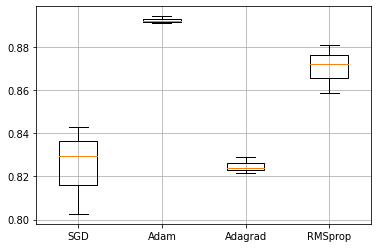

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.model_selection import KFold
import time

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_output=10

batch_siz=256
n_epoch=20
k=3

def build_model():
  model = Sequential()
  model.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2, activation='relu'))
  model.add(Dense(units=n_hidden3, activation='relu'))
  model.add(Dense(units=n_output, activation='softmax'))
  return model

def cross_validation(opt):
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    xtrain,xval = x_train[train_index], x_train[val_index]
    ytrain,yval = y_train[train_index], y_train[val_index]
    dmlp=build_model()
    dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    dmlp.fit(xtrain, ytrain, batch_size=batch_siz, epochs = n_epoch, verbose=0)
    accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
  return accuracy

start = time.time()
acc_sgd = cross_validation(SGD())
acc_adam = cross_validation(Adam()) 
acc_adagrad = cross_validation(Adagrad())
acc_rmsprop = cross_validation(RMSprop())
end = time.time()

print("SGD:", np.array(acc_sgd).mean())
print("Adam:", np.array(acc_adam).mean())
print("Adagrad:", np.array(acc_adagrad).mean())
print("RMSprop:", np.array(acc_rmsprop).mean())
print("걸린 시간은 ", end-start, "초입니다.")

import matplotlib.pyplot as plt

plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop], labels=["SGD", "Adam", "Adagrad", "RMSprop"])
plt.grid()